# makine öğrenmesi nedir?

## temel makine öğrenmesi yöntemleri:
- regresyon (gözetimli öğrenme / supervised learning)
- sınıflandırma (gözetimli)
- kümeleme (gözetimsiz)

https://guisebbe.wordpress.com/2014/01/24/excel-ile-basit-dogrusal-regresyon/

https://scikit-learn.org/stable/supervised_learning.html

bir veri ile 
- veri önişleme yap
- regresyon modeli eğit, 
- tahminle, 
- başarı ölç (mse, mae, rmse, mape) https://veribilimcisi.com/2017/07/14/mse-rmse-mae-mape-metrikleri-nedir/

ridge-lasso-elasticnet:
https://www.datacamp.com/community/tutorials/tutorial-ridge-lasso-elastic-net


In [111]:
from sklearn import linear_model
import numpy as np
import seaborn as sns
import pandas as pd

import ssl
ssl._create_default_https_context = ssl._create_unverified_context

tips = sns.load_dataset("tips")
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


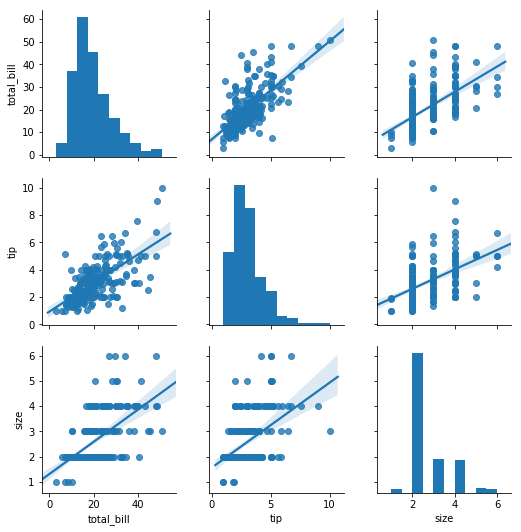

In [112]:
sns.pairplot(tips, kind="reg")

# regresyon (bağlanım analizi)
# doğrusal regresyon

In [113]:
# model seçimi
modelim = linear_model.LinearRegression()

In [114]:
modelim

LinearRegression()

In [116]:
# veri hazırlama ve eğitim/test bölme
X = np.array(tips["total_bill"])
Y = np.array(tips["tip"])
X

array([16.99, 10.34, 21.01, 23.68, 24.59, 25.29,  8.77, 26.88, 15.04,
       14.78, 10.27, 35.26, 15.42, 18.43, 14.83, 21.58, 10.33, 16.29,
       16.97, 20.65, 17.92, 20.29, 15.77, 39.42, 19.82, 17.81, 13.37,
       12.69, 21.7 , 19.65,  9.55, 18.35, 15.06, 20.69, 17.78, 24.06,
       16.31, 16.93, 18.69, 31.27, 16.04, 17.46, 13.94,  9.68, 30.4 ,
       18.29, 22.23, 32.4 , 28.55, 18.04, 12.54, 10.29, 34.81,  9.94,
       25.56, 19.49, 38.01, 26.41, 11.24, 48.27, 20.29, 13.81, 11.02,
       18.29, 17.59, 20.08, 16.45,  3.07, 20.23, 15.01, 12.02, 17.07,
       26.86, 25.28, 14.73, 10.51, 17.92, 27.2 , 22.76, 17.29, 19.44,
       16.66, 10.07, 32.68, 15.98, 34.83, 13.03, 18.28, 24.71, 21.16,
       28.97, 22.49,  5.75, 16.32, 22.75, 40.17, 27.28, 12.03, 21.01,
       12.46, 11.35, 15.38, 44.3 , 22.42, 20.92, 15.36, 20.49, 25.21,
       18.24, 14.31, 14.  ,  7.25, 38.07, 23.95, 25.71, 17.31, 29.93,
       10.65, 12.43, 24.08, 11.69, 13.42, 14.26, 15.95, 12.48, 29.8 ,
        8.52, 14.52,

In [117]:
X = X.reshape(-1,1)
Y = Y.reshape(-1,1)
X

array([[16.99],
       [10.34],
       [21.01],
       [23.68],
       [24.59],
       [25.29],
       [ 8.77],
       [26.88],
       [15.04],
       [14.78],
       [10.27],
       [35.26],
       [15.42],
       [18.43],
       [14.83],
       [21.58],
       [10.33],
       [16.29],
       [16.97],
       [20.65],
       [17.92],
       [20.29],
       [15.77],
       [39.42],
       [19.82],
       [17.81],
       [13.37],
       [12.69],
       [21.7 ],
       [19.65],
       [ 9.55],
       [18.35],
       [15.06],
       [20.69],
       [17.78],
       [24.06],
       [16.31],
       [16.93],
       [18.69],
       [31.27],
       [16.04],
       [17.46],
       [13.94],
       [ 9.68],
       [30.4 ],
       [18.29],
       [22.23],
       [32.4 ],
       [28.55],
       [18.04],
       [12.54],
       [10.29],
       [34.81],
       [ 9.94],
       [25.56],
       [19.49],
       [38.01],
       [26.41],
       [11.24],
       [48.27],
       [20.29],
       [13.81],
       [

In [118]:
# eğitim
modelim.fit(X, Y)

LinearRegression()

In [119]:
# model parametreleri
modelim.intercept_

array([0.92026961])

In [120]:
modelim.coef_

array([[0.10502452]])

In [121]:
modelim.intercept_ + modelim.coef_ * X[-1] # X teki son satırın tahmini bahşişi

array([[2.89263005]])

In [122]:
Y[-1]

array([3.])

In [123]:
# tahmin
tahminler = modelim.predict(X)
tahminler

array([[2.70463616],
       [2.00622312],
       [3.12683472],
       [3.40725019],
       [3.5028225 ],
       [3.57633966],
       [1.84133463],
       [3.74332864],
       [2.49983836],
       [2.47253198],
       [1.99887141],
       [4.6234341 ],
       [2.53974767],
       [2.85587147],
       [2.47778321],
       [3.1866987 ],
       [2.00517288],
       [2.631119  ],
       [2.70253567],
       [3.0890259 ],
       [2.80230897],
       [3.05121707],
       [2.57650625],
       [5.06033609],
       [3.00185555],
       [2.79075627],
       [2.32444741],
       [2.25303074],
       [3.19930164],
       [2.98400138],
       [1.92325375],
       [2.84746951],
       [2.50193885],
       [3.09322688],
       [2.78760553],
       [3.4471595 ],
       [2.63321949],
       [2.69833469],
       [2.88317784],
       [4.20438627],
       [2.60486287],
       [2.75399769],
       [2.38431139],
       [1.93690694],
       [4.11301494],
       [2.84116804],
       [3.25496464],
       [4.323

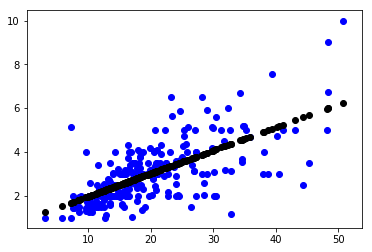

In [124]:
import matplotlib.pyplot as plt
plt.scatter(X, Y, c="blue")
plt.scatter(X, tahminler, c="black")

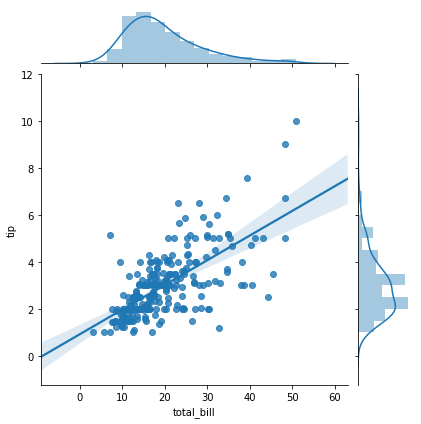

In [14]:
sns.jointplot(x="total_bill", y="tip", data=tips, kind="reg")

In [15]:
# başarı ölçümü
from sklearn import metrics
metrics.mean_absolute_error(Y, tahminler)

0.7458253894586339

In [16]:
metrics.mean_squared_error(Y, tahminler)

1.036019442011377

In [125]:
np.mean(Y)

2.99827868852459

# çoklu doğrusal regresyon

In [129]:
# veri hazırlama ve eğitim/test bölme
X = np.array(tips[["total_bill","size"]])
Y = np.array(tips["tip"])
X

array([[16.99,  2.  ],
       [10.34,  3.  ],
       [21.01,  3.  ],
       [23.68,  2.  ],
       [24.59,  4.  ],
       [25.29,  4.  ],
       [ 8.77,  2.  ],
       [26.88,  4.  ],
       [15.04,  2.  ],
       [14.78,  2.  ],
       [10.27,  2.  ],
       [35.26,  4.  ],
       [15.42,  2.  ],
       [18.43,  4.  ],
       [14.83,  2.  ],
       [21.58,  2.  ],
       [10.33,  3.  ],
       [16.29,  3.  ],
       [16.97,  3.  ],
       [20.65,  3.  ],
       [17.92,  2.  ],
       [20.29,  2.  ],
       [15.77,  2.  ],
       [39.42,  4.  ],
       [19.82,  2.  ],
       [17.81,  4.  ],
       [13.37,  2.  ],
       [12.69,  2.  ],
       [21.7 ,  2.  ],
       [19.65,  2.  ],
       [ 9.55,  2.  ],
       [18.35,  4.  ],
       [15.06,  2.  ],
       [20.69,  4.  ],
       [17.78,  2.  ],
       [24.06,  3.  ],
       [16.31,  3.  ],
       [16.93,  3.  ],
       [18.69,  3.  ],
       [31.27,  3.  ],
       [16.04,  3.  ],
       [17.46,  2.  ],
       [13.94,  2.  ],
       [ 9.

In [130]:
modelim.fit(X, Y)

LinearRegression()

In [131]:
modelim.intercept_ + modelim.coef_[0] * X[-1][0] + modelim.coef_[1] * X[-1][1]

2.7952967953040986

In [132]:
modelim.coef_

array([0.09271334, 0.19259779])

In [133]:
tahminler = modelim.predict(X)
tahminler

array([2.62933992, 2.20539403, 3.19464533, 3.24959215, 3.71915687,
       3.78405621, 1.86723629, 3.93147041, 2.44854892, 2.42444345,
       2.0063063 , 4.70840818, 2.48377998, 3.14804272, 2.42907911,
       3.05489414, 2.20446689, 2.75703838, 2.82008345, 3.16126853,
       2.71556333, 2.93529393, 2.51622965, 5.09409566, 2.89171867,
       3.09056045, 2.29371764, 2.23067257, 3.06601974, 2.8759574 ,
       1.9395527 , 3.14062565, 2.45040318, 3.35757486, 2.70258346,
       3.47742101, 2.75889265, 2.81637492, 2.97955039, 4.14588417,
       2.73386005, 2.67291519, 2.34656425, 1.95160543, 4.25782136,
       2.74986726, 3.11515781, 4.44324803, 3.89370389, 2.72668893,
       2.21676557, 2.00816057, 4.66668717, 1.9757109 , 3.80908881,
       2.86112326, 4.96336985, 3.50269956, 2.09623824, 5.91460869,
       2.93529393, 2.33451151, 2.0758413 , 3.13506285, 2.87756572,
       3.10842193, 2.57927472, 1.14617248, 2.92973113, 2.44576752,
       2.16855464, 2.82935478, 3.54442056, 3.39793348, 2.41980

In [134]:
metrics.mean_absolute_error(Y, tahminler)

0.7390035049097029

In [135]:
metrics.mean_squared_error(Y, tahminler)

1.014564905610028

In [136]:
veri = pd.get_dummies(tips)
veri

,total_bill,tip,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,1.01,2,0,1,0,1,0,0,0,1,0,1
1,10.34,1.66,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3.50,3,1,0,0,1,0,0,0,1,0,1
3,23.68,3.31,2,1,0,0,1,0,0,0,1,0,1
4,24.59,3.61,4,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,5.92,3,1,0,0,1,0,0,1,0,0,1
240,27.18,2.00,2,0,1,1,0,0,0,1,0,0,1
241,22.67,2.00,2,1,0,1,0,0,0,1,0,0,1
242,17.82,1.75,2,1,0,0,1,0,0,1,0,0,1


In [137]:
X = veri.drop(columns="tip")
sütun_isimleri = X.columns

Y = veri.tip 

In [138]:
X

,total_bill,size,sex_Male,sex_Female,smoker_Yes,smoker_No,day_Thur,day_Fri,day_Sat,day_Sun,time_Lunch,time_Dinner
0,16.99,2,0,1,0,1,0,0,0,1,0,1
1,10.34,3,1,0,0,1,0,0,0,1,0,1
2,21.01,3,1,0,0,1,0,0,0,1,0,1
3,23.68,2,1,0,0,1,0,0,0,1,0,1
4,24.59,4,0,1,0,1,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
239,29.03,3,1,0,0,1,0,0,1,0,0,1
240,27.18,2,0,1,1,0,0,0,1,0,0,1
241,22.67,2,1,0,1,0,0,0,1,0,0,1
242,17.82,2,1,0,0,1,0,0,1,0,0,1


In [139]:
Y

0      1.01
1      1.66
2      3.50
3      3.31
4      3.61
       ... 
239    5.92
240    2.00
241    2.00
242    1.75
243    3.00
Name: tip, Length: 244, dtype: float64

In [140]:

modelim.fit(X, Y)

LinearRegression()

In [142]:
tah = modelim.predict(X)
metrics.mean_absolute_error(Y, tah)

0.7332702739551589

In [143]:
modelim.intercept_

0.7011573948194583

In [144]:
modelim.coef_

array([ 0.09448701,  0.175992  , -0.01622047,  0.01622047, -0.04320416,
        0.04320416, -0.08495964,  0.07729956, -0.04415882,  0.0518189 ,
        0.0340643 , -0.0340643 ])

In [145]:
list(zip(modelim.coef_, sütun_isimleri))

[(0.09448700598873931, 'total_bill'),
 (0.1759920027535093, 'size'),
 (-0.01622047016508299, 'sex_Male'),
 (0.016220470165083004, 'sex_Female'),
 (-0.04320416008156677, 'smoker_Yes'),
 (0.04320416008156679, 'smoker_No'),
 (-0.0849596391521835, 'day_Thur'),
 (0.07729955844188278, 'day_Fri'),
 (-0.0441588179498218, 'day_Sat'),
 (0.0518188986601226, 'day_Sun'),
 (0.03406430053078216, 'time_Lunch'),
 (-0.034064300530782174, 'time_Dinner')]

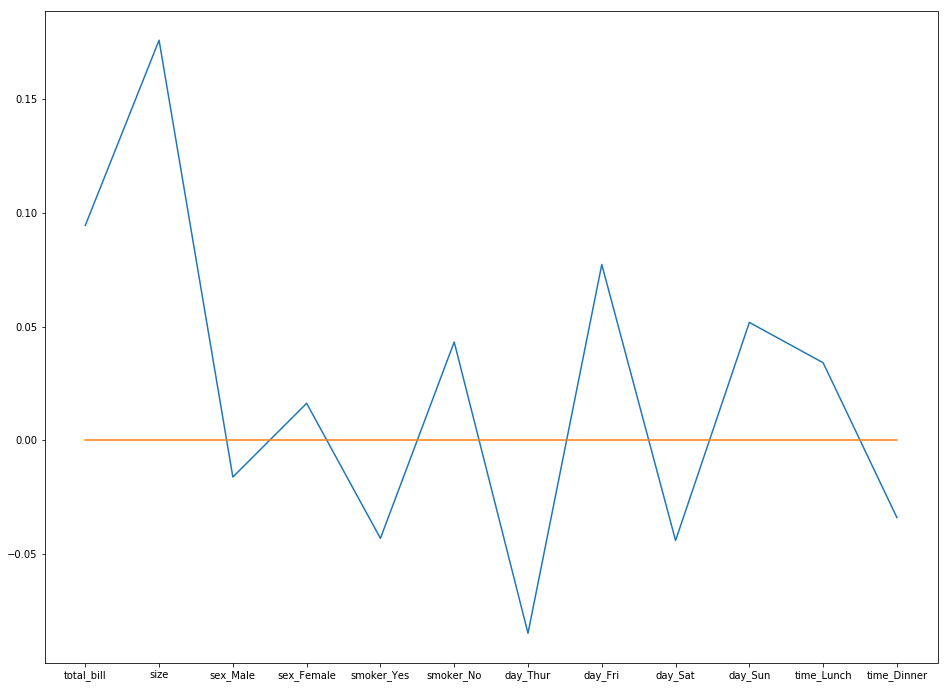

In [146]:
plt.figure(figsize=(16,12))
plt.plot(sütun_isimleri, modelim.coef_) # np.absolute(modelim.coef_)
plt.plot(np.linspace(0,0, 12))

# doğrusal olmayan regresyon (polinomal dönüşüm)

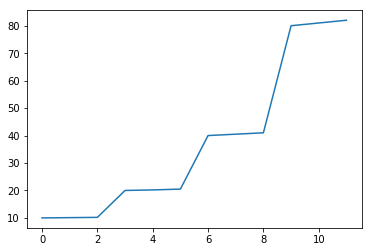

In [147]:

from sklearn.preprocessing import PolynomialFeatures
fiyatlar = [10, 10.1, 10.2, 20, 20.2, 20.5, 40, 40.5, 41, 80, 81, 82]
zamanlar = list(range(len(fiyatlar)))

fiyatlar = pd.DataFrame(fiyatlar)
zamanlar = pd.DataFrame(zamanlar)

plt.plot(zamanlar, fiyatlar)

In [148]:
#gelecek_zaman = [[12], [13], [14], [15], [16]]
gelecek_zaman = np.arange(25).reshape(-1, 1)
gelecek_zaman

array([[ 0],
       [ 1],
       [ 2],
       [ 3],
       [ 4],
       [ 5],
       [ 6],
       [ 7],
       [ 8],
       [ 9],
       [10],
       [11],
       [12],
       [13],
       [14],
       [15],
       [16],
       [17],
       [18],
       [19],
       [20],
       [21],
       [22],
       [23],
       [24]])

In [149]:
# model
regresyon_1 = linear_model.LinearRegression()

# eğitim
regresyon_1.fit(zamanlar, fiyatlar)

# tahminleme
tahmin1 = regresyon_1.predict(gelecek_zaman)
tahmin1

array([[ -2.50512821],
       [  4.8518648 ],
       [ 12.20885781],
       [ 19.56585082],
       [ 26.92284382],
       [ 34.27983683],
       [ 41.63682984],
       [ 48.99382284],
       [ 56.35081585],
       [ 63.70780886],
       [ 71.06480186],
       [ 78.42179487],
       [ 85.77878788],
       [ 93.13578089],
       [100.49277389],
       [107.8497669 ],
       [115.20675991],
       [122.56375291],
       [129.92074592],
       [137.27773893],
       [144.63473193],
       [151.99172494],
       [159.34871795],
       [166.70571096],
       [174.06270396]])

In [150]:
regresyon_1.coef_

array([[7.35699301]])

In [151]:
dönüştürücü = PolynomialFeatures(degree=2)
#print(dönüştürücü, type(dönüştürücü))

yeni_x = dönüştürücü.fit_transform(zamanlar) # 1.
print(yeni_x)
print()

# eğitildi
regresyon_2 = linear_model.LinearRegression()
regresyon_2.fit(yeni_x, fiyatlar) # x^ için değişti , y aynı

# tahmin
yeni_zaman_2 = dönüştürücü.fit_transform(gelecek_zaman) #2.
print("tahmin edilecek veri:")
print(gelecek_zaman)
print()
print("tahmin edilecek verinin yeni hali (2. derece):")
print(yeni_zaman_2)

[[  1.   0.   0.]
 [  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]
 [  1.  11. 121.]]

tahmin edilecek veri:
[[ 0]
 [ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]
 [20]
 [21]
 [22]
 [23]
 [24]]

tahmin edilecek verinin yeni hali (2. derece):
[[  1.   0.   0.]
 [  1.   1.   1.]
 [  1.   2.   4.]
 [  1.   3.   9.]
 [  1.   4.  16.]
 [  1.   5.  25.]
 [  1.   6.  36.]
 [  1.   7.  49.]
 [  1.   8.  64.]
 [  1.   9.  81.]
 [  1.  10. 100.]
 [  1.  11. 121.]
 [  1.  12. 144.]
 [  1.  13. 169.]
 [  1.  14. 196.]
 [  1.  15. 225.]
 [  1.  16. 256.]
 [  1.  17. 289.]
 [  1.  18. 324.]
 [  1.  19. 361.]
 [  1.  20. 400.]
 [  1.  21. 441.]
 [  1.  22. 484.]
 [  1.  23. 529.]
 [  1.  24. 576.]]


In [152]:
tahmin2 = regresyon_2.predict(yeni_zaman_2)
tahmin2

array([[  9.00082418],
       [ 10.08184316],
       [ 12.41805694],
       [ 16.00946553],
       [ 20.85606893],
       [ 26.95786713],
       [ 34.31486014],
       [ 42.92704795],
       [ 52.79443057],
       [ 63.91700799],
       [ 76.29478022],
       [ 89.92774725],
       [104.81590909],
       [120.95926573],
       [138.35781718],
       [157.01156344],
       [176.9205045 ],
       [198.08464036],
       [220.50397103],
       [244.1784965 ],
       [269.10821678],
       [295.29313187],
       [322.73324176],
       [351.42854645],
       [381.37904595]])

In [153]:
regresyon_2.coef_

array([[0.        , 0.45342158, 0.6275974 ]])

In [154]:
#3. derece regresyon tahmini
dönüştürücü_3 = PolynomialFeatures(degree=3)

# eğitim için gerekli input hazırlanıyor
yeni_zaman_3 = dönüştürücü_3.fit_transform(zamanlar)

# eğitim
regresyon_3 = linear_model.LinearRegression()
regresyon_3.fit(yeni_zaman_3, fiyatlar)

# tahmin için gerekli input (x) hazırlanıyor
yeni_zaman_3 = dönüştürücü_3.fit_transform(gelecek_zaman)

tahmin3 = regresyon_3.predict(yeni_zaman_3)
tahmin3

array([[ 11.24249084],
       [  9.87805528],
       [ 10.99154179],
       [ 14.31123321],
       [ 19.56541237],
       [ 26.48236208],
       [ 34.79036519],
       [ 44.21770452],
       [ 54.49266289],
       [ 65.34352314],
       [ 76.4985681 ],
       [ 87.68608059],
       [ 98.63434343],
       [109.07163947],
       [118.72625153],
       [127.32646243],
       [134.600555  ],
       [140.27681208],
       [144.08351648],
       [145.74895105],
       [145.0013986 ],
       [141.56914197],
       [135.18046398],
       [125.56364746],
       [112.44697525]])

In [155]:
regresyon_3.coef_

array([[ 0.        , -2.69396899,  1.37481962, -0.0452862 ]])

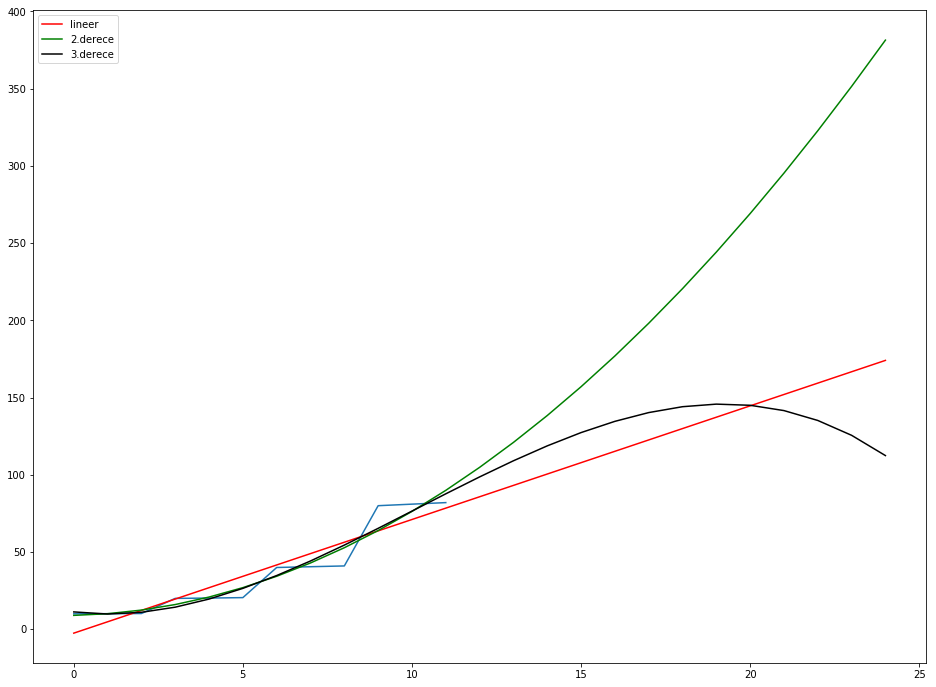

In [40]:
plt.figure(figsize=(16,12))
plt.plot(zamanlar, fiyatlar)
plt.plot(gelecek_zaman, tahmin1, color="red", label="lineer") # doğrusal tahmin gelecek 5 ay
plt.plot(gelecek_zaman, tahmin2, color="green", label="2.derece") # eğrisel 2. derece
plt.plot(gelecek_zaman, tahmin3, color="black", label="3.derece") # eğrisel 3. derece
plt.legend()
plt.show()

In [156]:
from sklearn import datasets

df = datasets.fetch_california_housing()
df

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [157]:
print(df.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [158]:
X = pd.DataFrame(df.data, columns=["MedInc", "HouseAge", "AveRooms", "AveBedrooms", "Population", "AveOccup", "Lat", "Long"])
X

,MedInc,HouseAge,AveRooms,AveBedrooms,Population,AveOccup,Lat,Long
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [159]:
Y = df["target"]
Y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

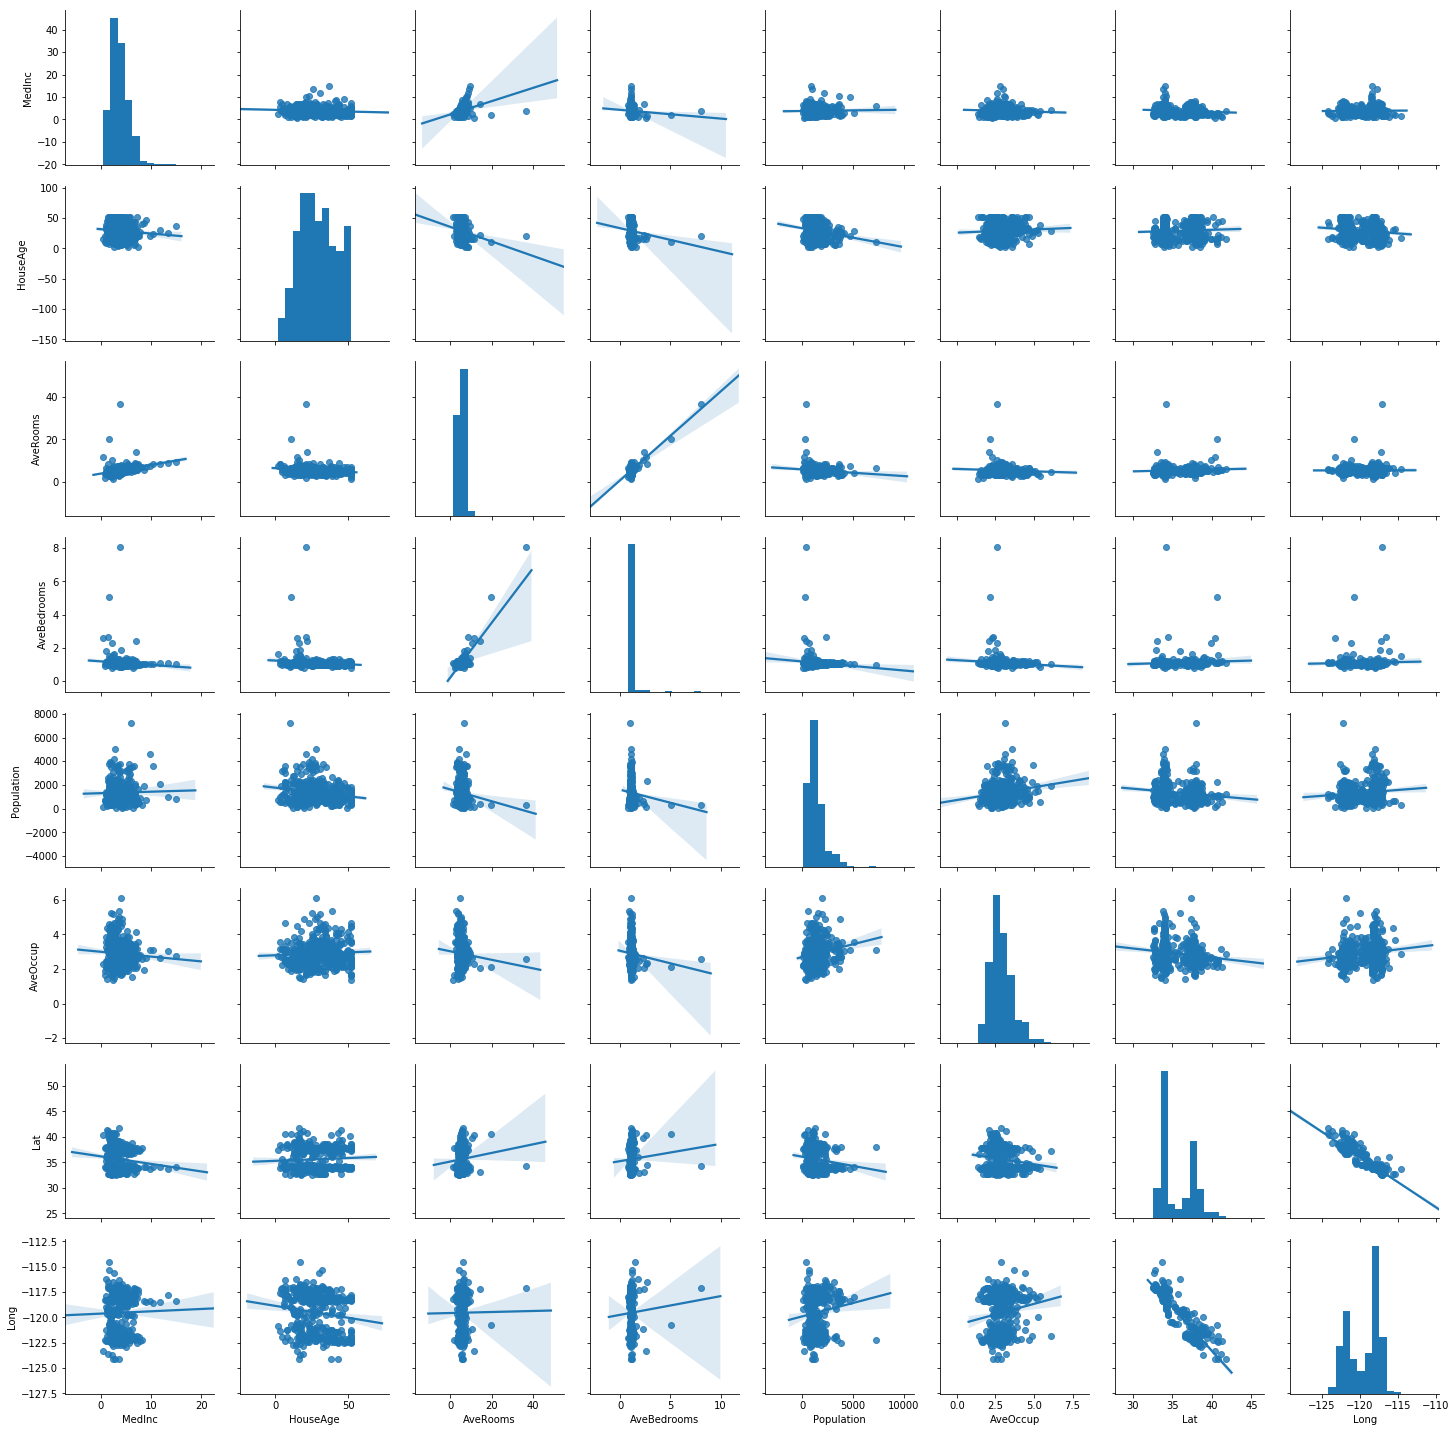

In [160]:
sns.pairplot(X[::50], kind="reg")

In [161]:
tüm = pd.DataFrame(X.copy())
tüm['price'] = Y
tüm

,MedInc,HouseAge,AveRooms,AveBedrooms,Population,AveOccup,Lat,Long,price
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


In [162]:
from sklearn.linear_model import Ridge, LinearRegression, Lasso, ElasticNet
from sklearn.model_selection import train_test_split

In [164]:
x_tr, x_test, y_tr, y_test = train_test_split(X, Y, test_size=0.2, random_state=8)

In [165]:
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(x_tr, y_tr)
ridge_model

Ridge()

In [167]:

#ridge_model.predict(X_test)

print(ridge_model.score(x_test, y_test))

ridge_tah = ridge_model.predict(x_test)
#ridge_tah

0.6179212072163108


In [168]:
metrics.mean_squared_error(y_test, ridge_tah)

0.5015655705340079

In [53]:
np.mean(Y)

2.068558169089147

In [169]:
metrics.mean_absolute_error(y_test, ridge_tah)

0.5267030044502627

In [170]:
ridge_model.set_params(alpha=20)
ridge_model.fit(x_tr, y_tr)

ridge_tah = ridge_model.predict(x_test)
metrics.mean_squared_error(y_test, ridge_tah)

0.5019071034763907

In [175]:
alphalar = [-250, -200, -150, -100, -10, -0.5, 0, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 0.8, 1, 10, 20, 100]
alphalar = np.arange(-250, -100, 10)
mse_ler = []
for i in alphalar:
    print(i)
    ridge_model.set_params(alpha=i)
    ridge_model.fit(x_tr, y_tr)
    ridge_tah = ridge_model.predict(x_test)
    print(ridge_model.coef_)
    mse = metrics.mean_squared_error(y_test, ridge_tah)
    print(mse)
    mse_ler.append(mse)
    print()

-250
[ 4.88042926e-01  9.30890531e-03 -2.08000480e-01  1.16379878e+00
 -5.77967477e-06 -3.58965900e-03 -4.10244476e-01 -4.27419350e-01]
0.5031289460777912

-240
[ 4.83654671e-01  9.34003302e-03 -1.99792657e-01  1.12166978e+00
 -5.65996080e-06 -3.57559938e-03 -4.11948904e-01 -4.28678408e-01]
0.5023369111523888

-230
[ 4.79584387e-01  9.37026450e-03 -1.92172065e-01  1.08252662e+00
 -5.54363978e-06 -3.56270033e-03 -4.13457078e-01 -4.29768211e-01]
0.5016970064824259

-220
[ 4.75799230e-01  9.39968196e-03 -1.85078164e-01  1.04606172e+00
 -5.43039986e-06 -3.55084093e-03 -4.14789771e-01 -4.30706783e-01]
0.501184256159089

-210
[ 4.72270719e-01  9.42835681e-03 -1.78458454e-01  1.01200838e+00
 -5.31997026e-06 -3.53991631e-03 -4.15964990e-01 -4.31509750e-01]
0.5007782103733033

-200
[ 4.68974036e-01  9.45635135e-03 -1.72267187e-01  9.80134148e-01
 -5.21211462e-06 -3.52983513e-03 -4.16998425e-01 -4.32190719e-01]
0.5004620297647784

-190
[ 4.65887452e-01  9.48372023e-03 -1.66464310e-01  9.50235556

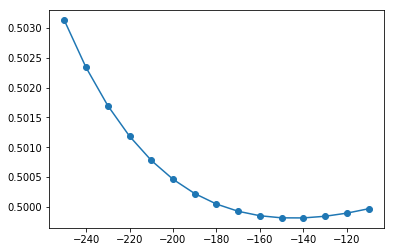

In [176]:
plt.plot(alphalar, mse_ler, marker="o")

In [177]:
print(ridge_model.coef_)
print()
print(ridge_model.intercept_)
print()
print("fiyat = {} + {} her bir sütunla çarpılır ".format(ridge_model.intercept_, ridge_model.coef_))

[ 4.46866257e-01  9.68493013e-03 -1.30535199e-01  7.64447165e-01
 -4.32978072e-06 -3.46649809e-03 -4.21731263e-01 -4.34401497e-01]

-36.96676569579309

fiyat = -36.96676569579309 + [ 4.46866257e-01  9.68493013e-03 -1.30535199e-01  7.64447165e-01
 -4.32978072e-06 -3.46649809e-03 -4.21731263e-01 -4.34401497e-01] her bir sütunla çarpılır 


In [178]:
# lasso

In [179]:
"""# Lasso regresyon"""

lasso_model = Lasso()

lasso_model.fit(x_tr, y_tr)

lasso_tah = lasso_model.predict(x_test)
metrics.mean_squared_error(y_test, lasso_tah)

0.9421516435990103

In [182]:
metrics.mean_absolute_error(y_test, lasso_tah)

0.9100403657250329

In [187]:
alphalar = [-0.5, 0.005, 0.01, 0.05, 0.1, 0.3, 0.5, 0.8, 1, 10, 50, 100, 300]
#alphalar = [-0.5, -0.1, 0, 0.005, 0.008, 0.01, 0.02, 0.03]
lasso_mse_ler = []
for i in alphalar:
    print(i)
    lasso_model.set_params(alpha=i)
    lasso_model.fit(x_tr, y_tr)
    lasso_tah = lasso_model.predict(x_test)
    mse = metrics.mean_squared_error(y_test, lasso_tah)
    print("mse:", mse)
    lasso_mse_ler.append(mse)
    print(lasso_model.coef_)
    print("intercept:", lasso_model.intercept_)
    print()

-0.5
mse: 11.975805193128465
[ 2.24416514e+00 -3.31461499e-02 -3.62489390e+00  1.88196740e+01
 -1.75005758e-04 -1.01293214e-02 -1.07183602e+00 -1.36607211e+00]
intercept: -131.50481200006942

0.005
mse: 0.5055747428993125
[ 4.12473946e-01  1.02785669e-02 -6.44233989e-02  4.21193590e-01
 -1.94349993e-06 -3.35704171e-03 -4.15016158e-01 -4.22750937e-01]
intercept: -35.68297396914868

0.01
mse: 0.5119397196368213
[ 3.94240055e-01  1.06304212e-02 -2.91788374e-02  2.38992496e-01
 -4.93720989e-07 -3.28605650e-03 -4.08883443e-01 -4.13815603e-01]
intercept: -34.76634299037528

0.05
mse: 0.5425516303861161
[ 3.82866108e-01  1.27564645e-02  0.00000000e+00  0.00000000e+00
  6.92051676e-06 -3.20071841e-03 -2.74960200e-01 -2.69424996e-01]
intercept: -22.197098352383374

0.1
mse: 0.5982543097317911
[ 3.88628718e-01  1.55448858e-02 -0.00000000e+00  0.00000000e+00
  1.91163367e-05 -3.15087590e-03 -1.09834756e-01 -9.30837910e-02]
intercept: -7.114917273681421

0.3
mse: 0.6738953242640883
[ 3.44495734e-0

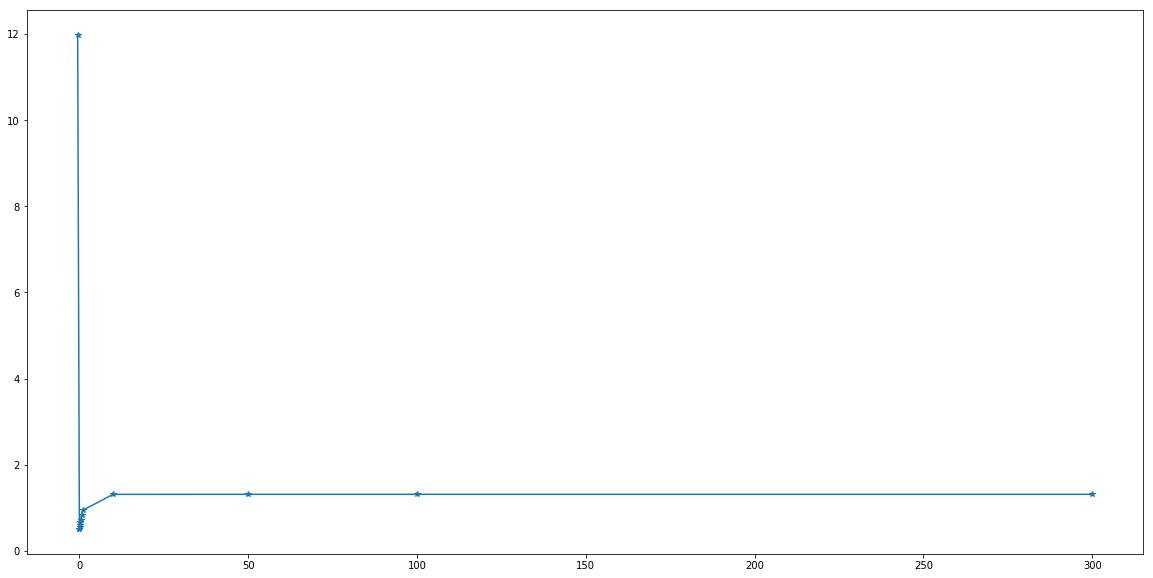

In [188]:
plt.figure(figsize=(20,10))
plt.plot(alphalar, lasso_mse_ler, marker="*")
plt.show()


In [192]:
"""# ElasticNet"""

enet_model = ElasticNet()

enet_model.fit(x_tr, y_tr)

enet_tahmin = enet_model.predict(x_test)
metrics.mean_squared_error(y_test, enet_tahmin)

0.7652122890805457

In [196]:
from sklearn.metrics import mean_absolute_percentage_error

ImportError: cannot import name 'mean_absolute_percentage_error'

In [197]:
alphalar = np.arange(-0.05,0.5, 0.01)

enet_mae_ler = []
for i in alphalar:
    print(i)
    enet_model.set_params(alpha=i)
    enet_model.fit(x_tr, y_tr)
    enet_tahmin = enet_model.predict(x_test)
    mse = metrics.mean_absolute_error(y_test, enet_tahmin)
    print(mse)
    enet_mae_ler.append(mse)
    print(enet_model.coef_)
    print()

-0.05


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 11371.080345557006, tolerance: 2.2062991467603803
  positive)


0.9534002413913566
[ 1.18009056e+00  5.52665703e-03 -1.49585411e+00  7.73392113e+00
 -2.07184170e-05 -6.10350884e-03 -8.75502721e-02 -1.71038342e-01]

-0.04


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 14250.654579778919, tolerance: 2.2062991467603803
  positive)


0.6150085052134422
[ 7.53346347e-01  7.14042045e-03 -7.05828728e-01  3.71181858e+00
 -1.44725614e-05 -4.55313451e-03 -3.27407282e-01 -3.72977321e-01]

-0.03


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 15536.430943284184, tolerance: 2.2062991467603803
  positive)


0.5454835568238172
[ 5.95334109e-01  8.06290402e-03 -4.11347592e-01  2.20773368e+00
 -1.08476780e-05 -3.99031928e-03 -3.98203598e-01 -4.28416656e-01]

-0.019999999999999997


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16362.336875246641, tolerance: 2.2062991467603803
  positive)


0.5274970322698813
[ 5.13574147e-01  8.77265300e-03 -2.57662719e-01  1.41948081e+00
 -8.02845692e-06 -3.70604482e-03 -4.21830882e-01 -4.43153106e-01]

-0.009999999999999995


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 16989.018057650337, tolerance: 2.2062991467603803
  positive)


0.5243214950993362
[ 4.63905491e-01  9.38055014e-03 -1.63370908e-01  9.33489412e-01
 -5.59435898e-06 -3.53774996e-03 -4.26202615e-01 -4.41403244e-01]

6.938893903907228e-18


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4366.2415932585, tolerance: 2.2062991467603803
  positive)


0.5266876679226544
[ 4.30704894e-01  9.92664602e-03 -9.96637606e-02  6.03377342e-01
 -3.39354844e-06 -3.42800711e-03 -4.21154489e-01 -4.31691678e-01]

0.010000000000000009
0.5306639536797025
[ 4.07049078e-01  1.04294766e-02 -5.37653629e-02  3.64204167e-01
 -1.35574946e-06 -3.35145024e-03 -4.11007004e-01 -4.17755373e-01]

0.020000000000000004
0.5349441238336141
[ 3.89452524e-01  1.09004910e-02 -1.92078649e-02  1.82987474e-01
  5.47912153e-07 -3.29547060e-03 -3.97810354e-01 -4.01347533e-01]

0.030000000000000013
0.5383636335130463
[ 3.79916843e-01  1.13081757e-02 -0.00000000e+00  7.29378898e-02
  2.05862327e-06 -3.26723668e-03 -3.79940803e-01 -3.81041507e-01]

0.04000000000000002
0.5401985694037703
[ 3.80386211e-01  1.16196747e-02  0.00000000e+00  4.55769401e-02
  2.86671674e-06 -3.27373572e-03 -3.55642210e-01 -3.55276884e-01]

0.05000000000000002
0.5430029582387653
[ 3.78037311e-01  1.19458422e-02  5.25235404e-03  0.00000000e+00
  3.90714611e-06 -3.26798670e-03 -3.34574642e-01 -3.325452

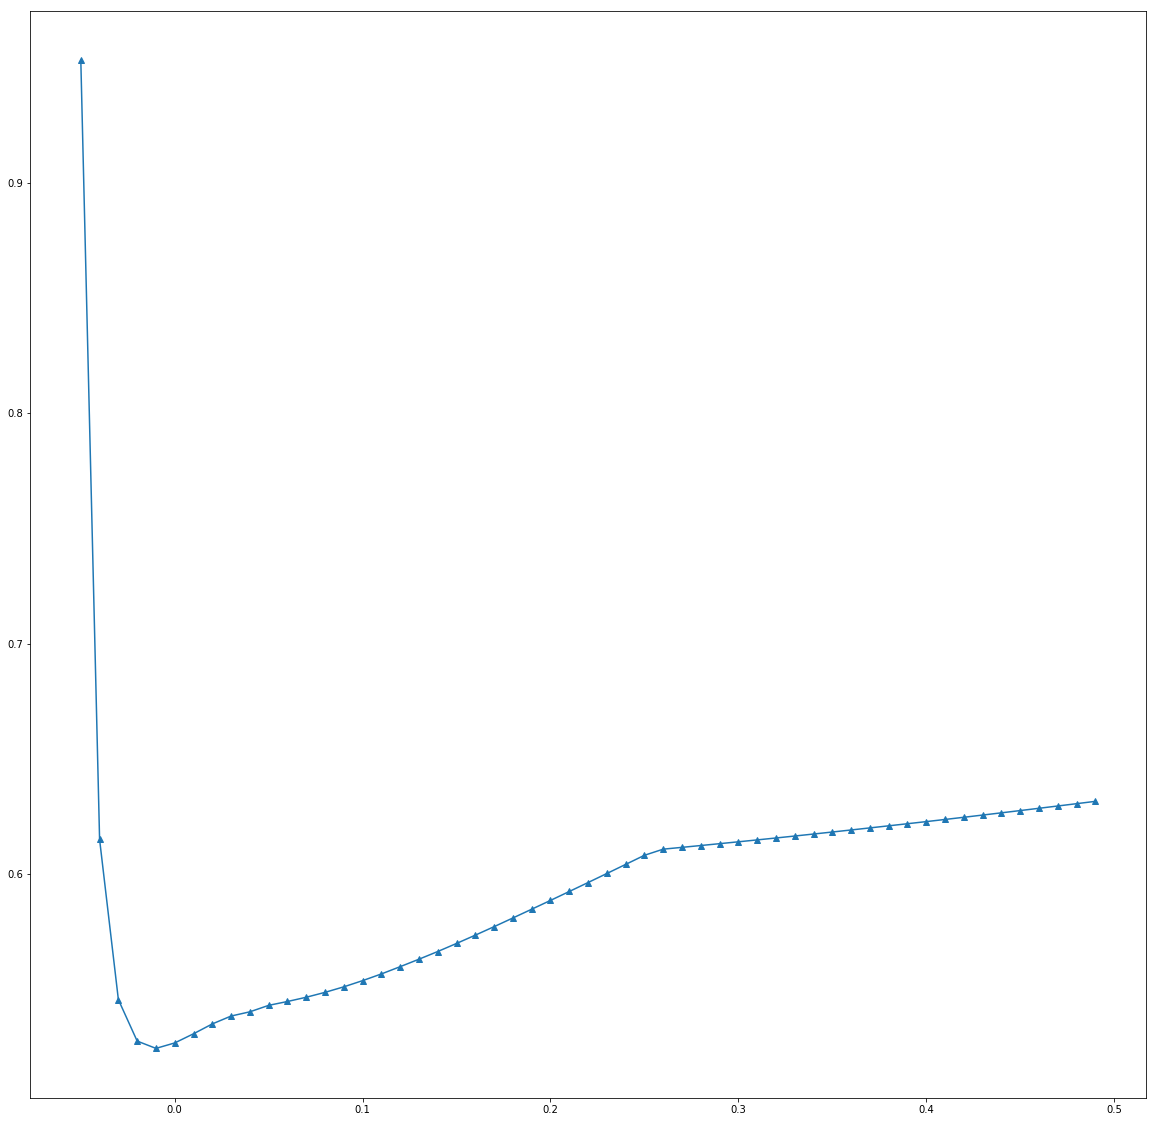

In [198]:
plt.figure(figsize=(20,20))
plt.plot(alphalar, enet_mae_ler, marker="^")

In [199]:
# time series analisis
# ar, ma, arima, sarima, sarimax, lstm

# 2. yöntem. normal regr.
# yıllık sezonsal ekti için yeni feature
# haftalık(0-6), günlük(0-23) .... ayrı featurelar

In [ ]:
# veri normalize edilebilir
# regresyon için (statsmodel) OLS modülü kullanılabilir. r2 değeri modelin veriyi açıklayabilme becerisi. 0-1 arası.

In [200]:
yol = "/Users/data/house-prices-advanced-regression-techniques/train.csv"
veri = pd.read_csv(yol)
veri

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [202]:
# Ridge ile deneyelim
X = veri.iloc[:,:-1]
X

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,4,2010,WD,Normal


In [203]:
X = pd.get_dummies(X)

In [204]:
X = X.fillna(X.mean())
X

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,...,0,0,0,1,0,0,0,0,1,0
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,...,0,0,0,1,0,0,0,0,1,0
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,...,0,0,0,1,0,0,0,0,1,0
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,...,0,0,0,1,1,0,0,0,0,0
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,62.0,7917,6,5,1999,2000,0.0,0,...,0,0,0,1,0,0,0,0,1,0
1456,1457,20,85.0,13175,6,6,1978,1988,119.0,790,...,0,0,0,1,0,0,0,0,1,0
1457,1458,70,66.0,9042,7,9,1941,2006,0.0,275,...,0,0,0,1,0,0,0,0,1,0
1458,1459,20,68.0,9717,5,6,1950,1996,0.0,49,...,0,0,0,1,0,0,0,0,1,0


In [205]:
Y = veri["SalePrice"]
Y

0       208500
1       181500
2       223500
3       140000
4       250000
         ...  
1455    175000
1456    210000
1457    266500
1458    142125
1459    147500
Name: SalePrice, Length: 1460, dtype: int64

In [206]:
#X = X.iloc[0:10]
#Y = Y[0:10]
#X.LotFrontage.isnull()

In [208]:


x_tr, x_test, y_tr, y_test = train_test_split(X, Y, test_size=0.2, random_state=6)
modelim = linear_model.Ridge().fit(x_tr, y_tr)
modelim

Ridge()

In [210]:
tah = modelim.predict(x_test)
metrics.mean_absolute_error(y_test, tah)

18514.38897628679

In [211]:
np.mean(y_test)

183995.48630136985

In [212]:
for i in np.arange(0,0.5, 0.02):
    modelim = linear_model.ElasticNet(alpha=i).fit(x_tr, y_tr)
    tah = modelim.predict(x_test)
    başarı = metrics.mean_absolute_error(y_test, tah)
    print(başarı)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  positive)
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 198077066270.3051, tolerance: 698001432.3780247
  positive)


17581.4552853889


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 356625776177.5794, tolerance: 698001432.3780247
  positive)


18842.127583914273


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 391160388357.229, tolerance: 698001432.3780247
  positive)


18907.310208744435


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 414198219769.4598, tolerance: 698001432.3780247
  positive)


18961.79367019911


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 431898102767.4564, tolerance: 698001432.3780247
  positive)


19028.18218166103


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 446410612109.53955, tolerance: 698001432.3780247
  positive)


19093.079403925974


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 458774593873.56903, tolerance: 698001432.3780247
  positive)


19146.000193693846


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 469580575672.6211, tolerance: 698001432.3780247
  positive)


19192.423022426607


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 479199432575.79736, tolerance: 698001432.3780247
  positive)


19243.490159093904


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 487880830339.27563, tolerance: 698001432.3780247
  positive)


19294.47751887505


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 495801335999.1241, tolerance: 698001432.3780247
  positive)


19341.88956060272


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 503090854349.3619, tolerance: 698001432.3780247
  positive)


19388.269357416746


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 509847812631.14703, tolerance: 698001432.3780247
  positive)


19439.08452116556


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 516148697939.45544, tolerance: 698001432.3780247
  positive)


19490.99214602035


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 522054176797.97833, tolerance: 698001432.3780247
  positive)


19544.553599877163


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 527613149273.07764, tolerance: 698001432.3780247
  positive)


19595.68037949284


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 532865866731.5924, tolerance: 698001432.3780247
  positive)


19641.69462185115


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 537845628535.79626, tolerance: 698001432.3780247
  positive)


19686.251689157805


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 542580282156.2909, tolerance: 698001432.3780247
  positive)


19728.40360016009


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 547093598321.9747, tolerance: 698001432.3780247
  positive)


19771.14688062641


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 551405825119.9343, tolerance: 698001432.3780247
  positive)


19814.93735431166


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 555534487738.1721, tolerance: 698001432.3780247
  positive)


19855.38977359899


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 559494812652.2322, tolerance: 698001432.3780247
  positive)


19892.862838331246


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 563300125784.6547, tolerance: 698001432.3780247
  positive)


19927.66333082757
19960.69674222051


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 566962146258.7296, tolerance: 698001432.3780247
  positive)


In [216]:
for i in np.arange(-50, 50, 10):
    modelim = linear_model.ElasticNet(alpha=0.1, l1_ratio=i).fit(x_tr, y_tr)
    tah = modelim.predict(x_test)
    başarı = metrics.mean_absolute_error(y_test, tah)
    print(başarı)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 837661864067.3522, tolerance: 698001432.3780247
  positive)


24377.330784071088


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 828052994628.6414, tolerance: 698001432.3780247
  positive)


24093.93211544499


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 813879133388.8442, tolerance: 698001432.3780247
  positive)


23675.260058600805


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 790300323642.0668, tolerance: 698001432.3780247
  positive)


23022.762459754413


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 741395054554.235, tolerance: 698001432.3780247
  positive)


21890.111903102486


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 514917359142.81146, tolerance: 698001432.3780247
  positive)


19341.622110641856


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 698001432.3780247
  positive)


60006.897682492025


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 698001432.3780247
  positive)


60006.897682492025


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: nan, tolerance: 698001432.3780247
  positive)


60006.897682492025
4.345905083649304e+121


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/linear_model/_coordinate_descent.py:531: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3.6135616589117567e+245, tolerance: 698001432.3780247
  positive)


# yeni örnek

In [218]:
yol = "/Users/data/spain_energy_market.csv"
veriler = pd.read_csv(yol)
veriler

,datetime,id,name,geoid,geoname,value
0,2014-01-01 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,25.280833
1,2014-01-02 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,39.924167
2,2014-01-03 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,4.992083
3,2014-01-04 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,4.091667
4,2014-01-05 23:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,13.587500
...,...,...,...,...,...,...
40207,2018-12-27 23:00:00,3,Generación programada PBF Turbinación bombeo,NaN,NaN,8838.000000
40208,2018-12-28 23:00:00,3,Generación programada PBF Turbinación bombeo,NaN,NaN,8738.800000
40209,2018-12-29 23:00:00,3,Generación programada PBF Turbinación bombeo,NaN,NaN,9020.000000
40210,2018-12-30 23:00:00,3,Generación programada PBF Turbinación bombeo,NaN,NaN,8466.200000


In [219]:
veriler['datetime'] = pd.to_datetime(veriler['datetime'], infer_datetime_format=True)
print(veriler.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 6 columns):
datetime    40212 non-null datetime64[ns]
id          40212 non-null int64
name        34734 non-null object
geoid       10956 non-null float64
geoname     10956 non-null object
value       40212 non-null float64
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 1.8+ MB
None


In [220]:
tarih_filtresi = (veriler['datetime'] > '2015-10-20') & (veriler['datetime'] <= '2015-10-30')
veriler.loc[tarih_filtresi]

,datetime,id,name,geoid,geoname,value
657,2015-10-20 22:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,48.879167
658,2015-10-21 22:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,51.419167
659,2015-10-22 22:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,56.762500
660,2015-10-23 22:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,50.964583
661,2015-10-24 22:00:00,600,Precio mercado SPOT Diario ESP,3.0,España,44.260000
...,...,...,...,...,...,...
39048,2015-10-25 23:00:00,3,Generación programada PBF Turbinación bombeo,NaN,NaN,5676.200000
39049,2015-10-26 23:00:00,3,Generación programada PBF Turbinación bombeo,NaN,NaN,5461.800000
39050,2015-10-27 23:00:00,3,Generación programada PBF Turbinación bombeo,NaN,NaN,3514.900000
39051,2015-10-28 23:00:00,3,Generación programada PBF Turbinación bombeo,NaN,NaN,12778.400000


In [221]:
fransa_filtresi = veriler["geoname"]=="Francia"
print(" ------------------- veriler[tarih_filtresi & fransa_filtresi) --")
print(veriler[tarih_filtresi & fransa_filtresi])

 ------------------- veriler[tarih_filtresi & fransa_filtresi) --
                 datetime   id                            name  geoid  \
2483  2015-10-20 22:00:00  600  Precio mercado SPOT Diario FRA    2.0   
2484  2015-10-21 22:00:00  600  Precio mercado SPOT Diario FRA    2.0   
2485  2015-10-22 22:00:00  600  Precio mercado SPOT Diario FRA    2.0   
2486  2015-10-23 22:00:00  600  Precio mercado SPOT Diario FRA    2.0   
2487  2015-10-24 22:00:00  600  Precio mercado SPOT Diario FRA    2.0   
2488  2015-10-25 23:00:00  600  Precio mercado SPOT Diario FRA    2.0   
2489  2015-10-26 23:00:00  600  Precio mercado SPOT Diario FRA    2.0   
2490  2015-10-27 23:00:00  600  Precio mercado SPOT Diario FRA    2.0   
2491  2015-10-28 23:00:00  600  Precio mercado SPOT Diario FRA    2.0   
2492  2015-10-29 23:00:00  600  Precio mercado SPOT Diario FRA    2.0   
11102 2015-10-20 22:00:00  600                             NaN    2.0   
11105 2015-10-21 22:00:00  600                            

In [222]:
fr_2018 = veriler.loc[fransa_filtresi].reset_index()
fr_2018

,index,datetime,id,name,geoid,geoname,value
0,1826,2014-01-01 23:00:00,600,Precio mercado SPOT Diario FRA,2.0,Francia,28.711250
1,1827,2014-01-02 23:00:00,600,Precio mercado SPOT Diario FRA,2.0,Francia,28.397500
2,1828,2014-01-03 23:00:00,600,Precio mercado SPOT Diario FRA,2.0,Francia,12.997500
3,1829,2014-01-04 23:00:00,600,Precio mercado SPOT Diario FRA,2.0,Francia,23.085000
4,1830,2014-01-05 23:00:00,600,Precio mercado SPOT Diario FRA,2.0,Francia,31.290000
...,...,...,...,...,...,...,...
3647,14594,2018-12-27 23:00:00,600,NaN,2.0,Francia,60.839167
3648,14597,2018-12-28 23:00:00,600,NaN,2.0,Francia,53.448333
3649,14600,2018-12-29 23:00:00,600,NaN,2.0,Francia,47.331250
3650,14603,2018-12-30 23:00:00,600,NaN,2.0,Francia,55.321667


In [223]:
fr_2018.sort_values("datetime", inplace=True)
fr_2018

,index,datetime,id,name,geoid,geoname,value
0,1826,2014-01-01 23:00:00,600,Precio mercado SPOT Diario FRA,2.0,Francia,28.711250
1826,9131,2014-01-01 23:00:00,600,NaN,2.0,Francia,28.711250
1,1827,2014-01-02 23:00:00,600,Precio mercado SPOT Diario FRA,2.0,Francia,28.397500
1827,9134,2014-01-02 23:00:00,600,NaN,2.0,Francia,28.397500
2,1828,2014-01-03 23:00:00,600,Precio mercado SPOT Diario FRA,2.0,Francia,12.997500
...,...,...,...,...,...,...,...
1823,3649,2018-12-29 23:00:00,600,Precio mercado SPOT Diario FRA,2.0,Francia,47.331250
3650,14603,2018-12-30 23:00:00,600,NaN,2.0,Francia,55.321667
1824,3650,2018-12-30 23:00:00,600,Precio mercado SPOT Diario FRA,2.0,Francia,55.321667
1825,3651,2018-12-31 23:00:00,600,Precio mercado SPOT Diario FRA,2.0,Francia,41.242500


In [228]:

import datetime as dt

tarihler_18_ordinal = np.array(fr_2018["datetime"].map(dt.datetime.toordinal)).reshape(-1, 1)
print(tarihler_18_ordinal)

[[735234]
 [735234]
 [735235]
 ...
 [737058]
 [737059]
 [737059]]


In [229]:
#dt.datetime.toordinal("2020-4-18") #-> 123456456

In [230]:
fr_2018_tüketim = np.array(fr_2018["value"]).reshape(-1, 1)

In [240]:
modelim = linear_model.LinearRegression()
modelim.fit(tarihler_18_ordinal, fr_2018_tüketim)

LinearRegression()

In [241]:
modelim.predict(tarihler_18_ordinal)

array([[30.69789206],
       [30.69789206],
       [30.70919857],
       ...,
       [51.32096018],
       [51.33226668],
       [51.33226668]])

In [242]:
tarihler_19_ordinal = tarihler_18_ordinal + 365
tarihler_19_ordinal

array([[735599],
       [735599],
       [735600],
       ...,
       [737423],
       [737424],
       [737424]])

In [239]:
tahminler_2019 = modelim.predict(tarihler_19_ordinal)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)->(n?,m?) (size 3 is different from 1)

In [233]:
fr_2018

,index,datetime,id,name,geoid,geoname,value
0,1826,2014-01-01 23:00:00,600,Precio mercado SPOT Diario FRA,2.0,Francia,28.711250
1826,9131,2014-01-01 23:00:00,600,NaN,2.0,Francia,28.711250
1,1827,2014-01-02 23:00:00,600,Precio mercado SPOT Diario FRA,2.0,Francia,28.397500
1827,9134,2014-01-02 23:00:00,600,NaN,2.0,Francia,28.397500
2,1828,2014-01-03 23:00:00,600,Precio mercado SPOT Diario FRA,2.0,Francia,12.997500
...,...,...,...,...,...,...,...
1823,3649,2018-12-29 23:00:00,600,Precio mercado SPOT Diario FRA,2.0,Francia,47.331250
3650,14603,2018-12-30 23:00:00,600,NaN,2.0,Francia,55.321667
1824,3650,2018-12-30 23:00:00,600,Precio mercado SPOT Diario FRA,2.0,Francia,55.321667
1825,3651,2018-12-31 23:00:00,600,Precio mercado SPOT Diario FRA,2.0,Francia,41.242500


In [243]:
# diğer yöntem
tarihler = fr_2018["datetime"]
tarihler_2019 = tarihler + pd.offsets.DateOffset(years=1)

In [244]:
#  tahminleme
dönüştürücü = PolynomialFeatures(degree=2)
tarihler_18_ordinal_d = dönüştürücü.fit_transform(tarihler_18_ordinal)

modelim.fit(tarihler_18_ordinal_d, fr_2018_tüketim)


LinearRegression()

In [245]:
tarihler_18_ordinal_d

array([[1.00000000e+00, 7.35234000e+05, 5.40569035e+11],
       [1.00000000e+00, 7.35234000e+05, 5.40569035e+11],
       [1.00000000e+00, 7.35235000e+05, 5.40570505e+11],
       ...,
       [1.00000000e+00, 7.37058000e+05, 5.43254495e+11],
       [1.00000000e+00, 7.37059000e+05, 5.43255969e+11],
       [1.00000000e+00, 7.37059000e+05, 5.43255969e+11]])

In [246]:
# tahmin
tah_18_eğrisel = modelim.predict(tarihler_18_ordinal_d)

tarihler_2019 = np.array(tarihler_2019).reshape(-1,1)
print(tarihler_2019.shape)

(3652, 1)


In [247]:
tarihler_19_ordinal_d = dönüştürücü.fit_transform(tarihler_19_ordinal)

# polinomal dönüşümden geçmiş featurelar
tah_19_eğrisel = modelim.predict(tarihler_19_ordinal_d)

tarihler_2020 = tarihler + pd.offsets.DateOffset(years=2)
tarihler_20_ordinal = tarihler_19_ordinal + 365
tarihler_20_ordinal_d = dönüştürücü.fit_transform(tarihler_20_ordinal)
tah_20_eğrisel = modelim.predict(tarihler_20_ordinal_d)



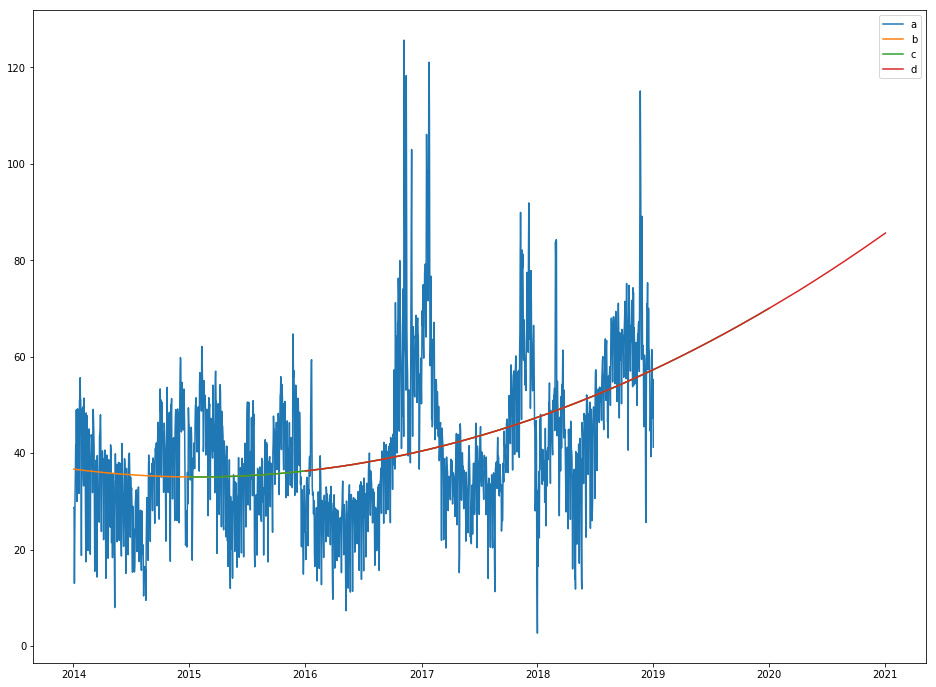

In [250]:
plt.figure(figsize=(16,12))
plt.plot(tarihler, fr_2018_tüketim, label="a")
plt.plot(tarihler, tah_18_eğrisel, label="b")
plt.plot(tarihler_2019, tah_19_eğrisel, label="c")
plt.plot(tarihler_2020, tah_20_eğrisel, label="d")
plt.legend()
plt.show()

In [251]:
# 3. derece
dönüştürücü = PolynomialFeatures(degree=3)
tarihler_18_ordinal_d = dönüştürücü.fit_transform(tarihler_18_ordinal)

modelim.fit(tarihler_18_ordinal_d, fr_2018_tüketim)

LinearRegression()

In [252]:
tah_18_eğrisel = modelim.predict(tarihler_18_ordinal_d)

tarihler_2019 = np.array(tarihler_2019).reshape(-1,1)
print(tarihler_2019.shape)

(3652, 1)


In [253]:
tarihler_19_ordinal_d = dönüştürücü.fit_transform(tarihler_19_ordinal)

# polinomal dönüşümden geçmiş featurelar
tah_19_eğrisel = modelim.predict(tarihler_19_ordinal_d)

tarihler_2020 = tarihler + pd.offsets.DateOffset(years=2)
tarihler_20_ordinal = tarihler_19_ordinal + 365
tarihler_20_ordinal_d = dönüştürücü.fit_transform(tarihler_20_ordinal)
tah_20_eğrisel = modelim.predict(tarihler_20_ordinal_d)

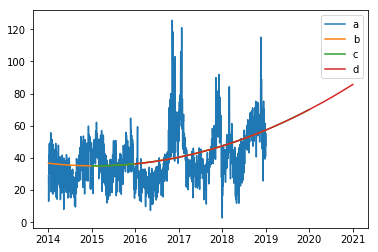

In [254]:
plt.plot(tarihler, fr_2018_tüketim, label="a")
plt.plot(tarihler, tah_18_eğrisel, label="b")
plt.plot(tarihler_2019, tah_19_eğrisel, label="c")
plt.plot(tarihler_2020, tah_20_eğrisel, label="d")
plt.legend()
plt.show()

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/utils/validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


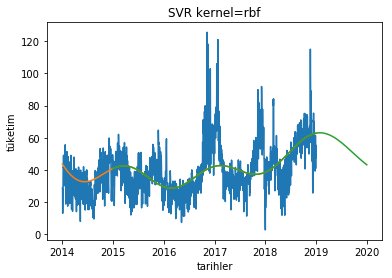

In [255]:
# farklı algoritma
from sklearn.svm import SVR 

tahminleyici_svr_2 = SVR(kernel='rbf', C=50)
tahminleyici_svr_2.fit(tarihler_18_ordinal, fr_2018_tüketim)
tahminler_18 = tahminleyici_svr_2.predict(tarihler_18_ordinal)
tahminler_19 = tahminleyici_svr_2.predict(tarihler_19_ordinal)

#tahminler_20 = tahminleyici_svr_2.predict(tarihler_20_ordinal)

plt.plot(tarihler, fr_2018_tüketim)
plt.plot(tarihler, tahminler_18)
plt.plot(tarihler_2019, tahminler_19)
#plt.plot(tarihler_2020, tahminler_20)
plt.xlabel("tarihler")
plt.ylabel("tüketim")
plt.title("SVR kernel=rbf")

plt.show()